In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [2]:
dataset=tf.keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


4


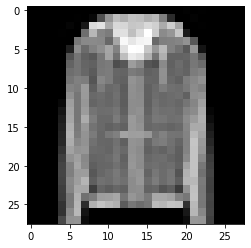

In [3]:
plt.imshow(X_train[28],cmap='gray')
print(Y_train[28])

In [4]:
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


In [5]:
X_train=X_train.reshape(60000,784)


In [6]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [7]:
model=tf.keras.models.Sequential([
    Dense(64,input_dim=784,activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')#output_layer

])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

In [9]:
model.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),epochs=10)

Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 2.7977 - accuracy: 0.7084 - val_loss: 0.7549 - val_accuracy: 0.7686
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6739 - accuracy: 0.7818 - val_loss: 0.7114 - val_accuracy: 0.7650
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5859 - accuracy: 0.8055 - val_loss: 0.6566 - val_accuracy: 0.7797
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5484 - accuracy: 0.8139 - val_loss: 0.5302 - val_accuracy: 0.8284
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5230 - accuracy: 0.8196 - val_loss: 0.5997 - val_accuracy: 0.8208
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5111 - accuracy: 0.8250 - val_loss: 0.5453 - val_accuracy: 0.8174
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4890 - accuracy: 0.8330 - val_loss: 0.5558 - val_accuracy:

In [10]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(10000,784)
print(X_test.shape)


(10000, 28, 28)
(10000,)
(10000, 784)


In [11]:
accuracy = model.evaluate(X_test,Y_test)

print("accuracy =", accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.8207
accuracy = [0.5525524616241455, 0.8206999897956848]


In [12]:


X_train_deep,X_test_deep = X_train_deep/255.0, X_test_deep/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_deep,Y_train_deep, epochs=10)
model.evaluate(X_test_deep, Y_test_deep)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5343 - accuracy: 0.8117
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3996 - accuracy: 0.8566
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3650 - accuracy: 0.8667
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3455 - accuracy: 0.8741
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3274 - accuracy: 0.8800
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.8826
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3025 - accuracy: 0.8882
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8902
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2893 - accuracy: 0.8931
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3659 

[0.36590659618377686, 0.8682000041007996]

In [15]:
X_train_deep, X_test_deep = X_train_deep / 255.0, X_test_deep / 255.0

X_train_deep=X_train_deep.reshape(X_train_deep.shape[0],X_train_deep.shape[1],X_train_deep.shape[2],1)
X_test_deep=X_test_deep.reshape(X_test_deep.shape[0],X_test_deep.shape[1],X_test_deep.shape[2],1)
deep_model=tf.keras.models.Sequential([
                                       layers.Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)),
                                       layers.Conv2D(64,(3,3),activation='relu'),
                                       layers.Flatten(),
                                       layers.Dense(64,activation='relu'),
                                       layers.Dense(10,activation='softmax')
])
deep_model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

deep_model.fit(X_train_deep, Y_train_deep, epochs=3)
deep_model.evaluate(X_test_deep, Y_test_deep)

Epoch 1/3
1875/1875 [==============================] - 131s 69ms/step - loss: 2.3028 - accuracy: 0.0999
Epoch 2/3
1875/1875 [==============================] - 130s 69ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 3/3
313/313 [==============================] - 5s 16ms/step - loss: 2.3027 - accuracy: 0.1000


[2.302691698074341, 0.10000000149011612]